In [78]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
### para saber si una grafo es simetrico o no lo es simplemente se puede observar si la matriz es simetrica 

In [27]:
## crear grafo dirigido 
G = nx.Graph()

G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A', 'B'),
                 ('A', 'D'),
                 ('B', 'C'),
                 ('C', 'E'),
                 ('D', 'E')])

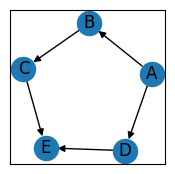

In [11]:
plt.figure(figsize=(2,2))
nx.draw_networkx(G, arrows=True, arrowstyle='-|>')

In [ ]:
### crear un dataframe con los pesos 

In [33]:
columnas = ['A', 'B','C','D','E']
data = np.zeros([5,5])
df = pd.DataFrame(data=data,columns=columnas, index=columnas)
df.loc['A','B'] = 2.1
df.loc['B','A'] = 8.6
df.loc['B','C'] = 10.2
df.loc['C','B'] = 7.3
df.loc['C','E'] = 1.1
df.loc['E','C'] = 3.56
df.loc['E','D'] = 0.8
df.loc['D','E'] = 4.2
df.loc['A','D'] = 7.5
df.loc['D','A'] = 6.6

df

,A,B,C,D,E
A,0.0,2.1,0.00,7.5,0.0
B,8.6,0.0,10.20,0.0,0.0
C,0.0,7.3,0.00,0.0,1.1
D,6.6,0.0,0.00,0.0,4.2
E,0.0,0.0,3.56,0.8,0.0


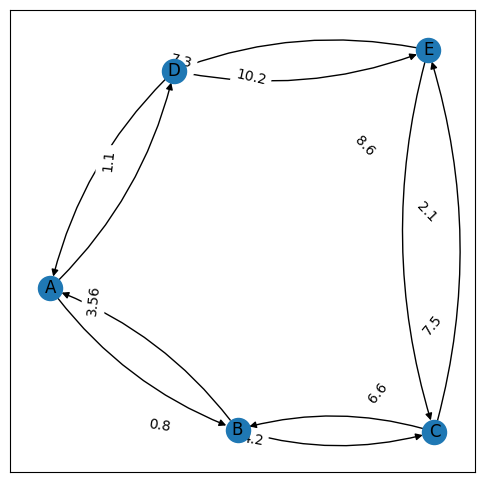

In [38]:
G = nx.from_pandas_adjacency(df, create_using = nx.DiGraph())

plt.figure(figsize=(6,6))
pos= nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')

pesos = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, pesos, label_pos=0.3);

In [39]:
pesos

{('A', 'B'): 2.1,
 ('A', 'D'): 7.5,
 ('B', 'A'): 8.6,
 ('B', 'C'): 10.2,
 ('C', 'B'): 7.3,
 ('C', 'E'): 1.1,
 ('D', 'A'): 6.6,
 ('D', 'E'): 4.2,
 ('E', 'C'): 3.56,
 ('E', 'D'): 0.8}

In [ ]:
### de esos datos hacer los cuartiles, mapa de calor y mapa de calor con el umbral (del 50%) del cuartil

In [48]:
df.groupby

<bound method DataFrame.groupby of      A    B      C    D    E
A  0.0  2.1   0.00  7.5  0.0
B  8.6  0.0  10.20  0.0  0.0
C  0.0  7.3   0.00  0.0  1.1
D  6.6  0.0   0.00  0.0  4.2
E  0.0  0.0   3.56  0.8  0.0>

In [57]:
serie_pesos = pd.Series(list(pesos.values()))


In [59]:
cuartiles = serie_pesos.quantile([0.25, 0.5, 0.75])
cuartiles

0.25    2.465
0.50    5.400
0.75    7.450
dtype: float64

In [61]:
df_pesos = pd.DataFrame(
    list(pesos.items()),
    columns=['Arista', 'Peso'])
df_pesos

,Arista,Peso
0,"(A, B)",2.10
1,"(A, D)",7.50
2,"(B, A)",8.60
3,"(B, C)",10.20
4,"(C, B)",7.30
5,"(C, E)",1.10
6,"(D, A)",6.60
7,"(D, E)",4.20
8,"(E, C)",3.56
9,"(E, D)",0.80


In [63]:
cuartiles = df_pesos['Peso'].quantile([0.25, 0.5, 0.75])
Q1, Q2, Q3 = cuartiles[0.25], cuartiles[0.5], cuartiles[0.75]
cuartiles

0.25    2.465
0.50    5.400
0.75    7.450
Name: Peso, dtype: float64

In [73]:
def asignar_cuartil(peso):
    if peso <= Q1:
        return 'Q1'
    elif peso <= Q2:
        return 'Q2'
    elif peso <= Q3:
        return 'Q3'
    else:
        return 'Q4'

df_pesos['Cuartil'] = df_pesos['Peso'].apply(asignar_cuartil)

In [74]:
colores = {'Q1': 'blue', 'Q2': 'green', 'Q3': 'orange', 'Q4': 'red'}
df_pesos['Color'] = df_pesos['Cuartil'].map(colores)

In [80]:
plt.figure(figsize=(4,4))
ax = sns.heatmap(df_pesos, 
                 annot=True, cmap='hot', fmt='.2f',
                 xticklabels=df_pesos.arista, yticklabels=df_pesos.pesos)
ax.set(xlabel='canales', ylabel='canales')
plt.show()            

AttributeError: 'DataFrame' object has no attribute 'arista'

<Figure size 400x400 with 0 Axes>